<a href="https://colab.research.google.com/github/Mina-Moeini/BioMedical-Segmentation/blob/main/BIOMED_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from skimage.measure import find_contours
from scipy.spatial.distance import dice
from skimage.transform import rescale
from scipy.io import loadmat

from scipy import ndimage as ndi
from skimage import io as skio
from skimage.filters import threshold_otsu
import skimage.morphology as morpho
from skimage.segmentation import watershed
from skimage.draw import line
from skimage.transform import rescale
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import circle_level_set

In [ ]:
def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.diamond(taille)
    if forme == 'disk':
        return morpho.disk(taille)
    if forme == 'square':
        return morpho.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')

In [ ]:
Working_directory="C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg"

In [ ]:
abdominalCT_path = Working_directory + '/abdominalCT/abdominalCT/'
#print(abdominalCT_path)
listImagesabdCT=glob.glob(abdominalCT_path + '/*-seg.tiff')
print('There are', len(listImagesabdCT),  'abdomical CT images')
print(listImagesabdCT)

C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/abdominalCT/abdominalCT/
There are 6 abdomical CT images
['C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/abdominalCT/abdominalCT\\CTs1-seg.tiff', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/abdominalCT/abdominalCT\\CTs2-seg.tiff', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/abdominalCT/abdominalCT\\CTs3-seg.tiff', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/abdominalCT/abdominalCT\\CTs4-seg.tiff', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/abdominalCT/abdominalCT\\CTs5-seg.tiff', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/abdominalCT/abdominalCT\\CTs6-seg.tiff']


In [ ]:
brainMRI_path = Working_directory + '/brainMRI/brainMRI/'
#print(brainMRI_path)
listImagesbrainMRI=glob.glob(brainMRI_path + '/*-seg.png')
print('There are', len(listImagesbrainMRI),  'brain MRI images')
print(listImagesbrainMRI)

There are 4 brain MRI images
['C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/brainMRI/brainMRI\\MRIs1-seg.png', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/brainMRI/brainMRI\\MRIs2-seg.png', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/brainMRI/brainMRI\\MRIs3-seg.png', 'C:/Users/Asus/Desktop/IMA/BIOMED/dataTPseg/brainMRI/brainMRI\\MRIs4-seg.png']


In [ ]:
MRIheart_path = Working_directory + '/MRIheart/MRIheart/'

## 1-Segmentation using thresholding

* compare the histograms of images of the same modality. Are the conclusions the same on CT images and on MRI images?
* consequences on manual thresholding?
* test the automatic Otsu's thresholding method. Conclusions?
* test the automatic k-means method (2 classes or more). Conclusions?

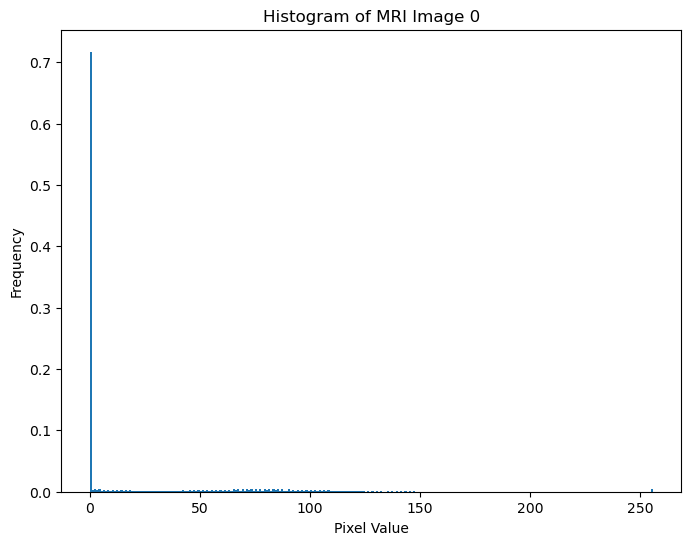

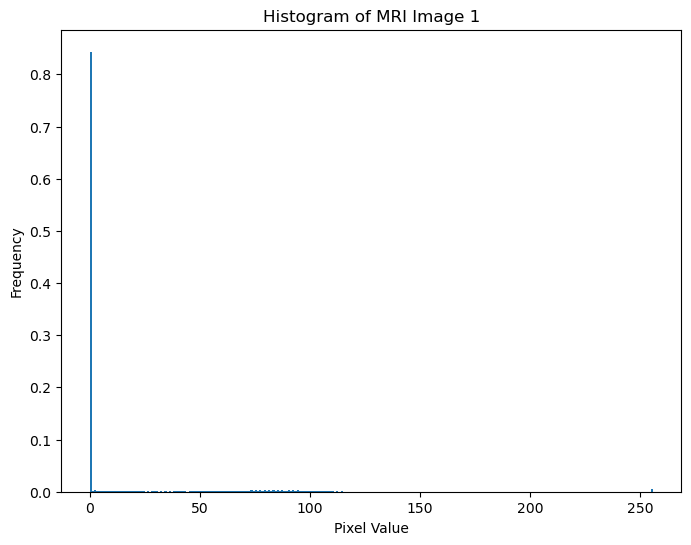

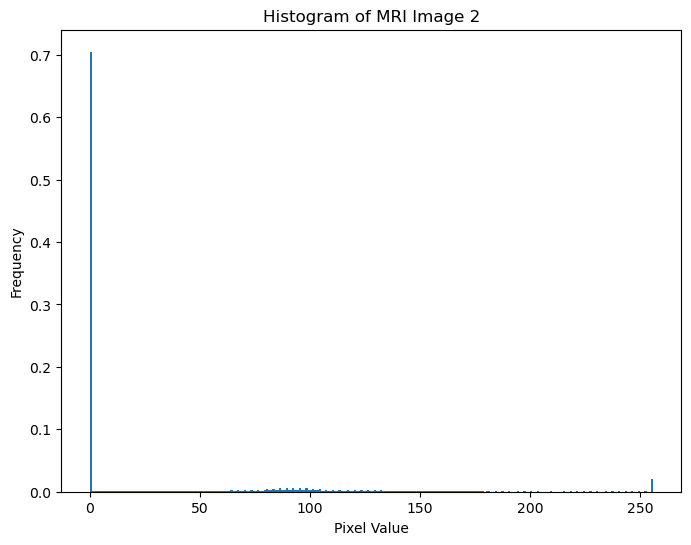

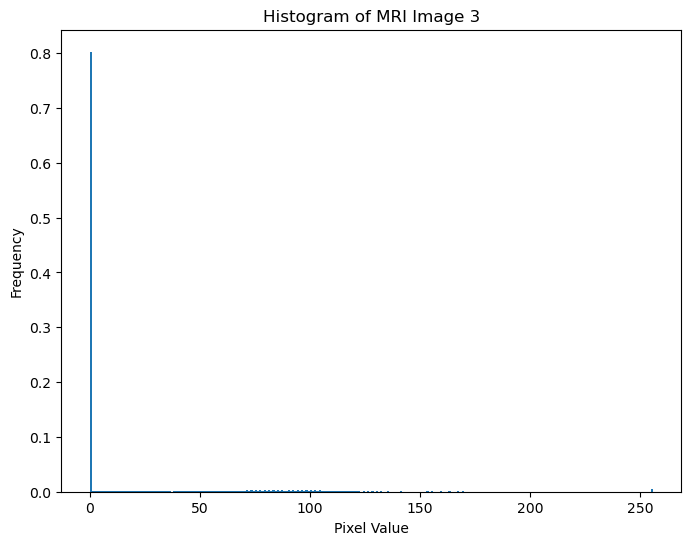

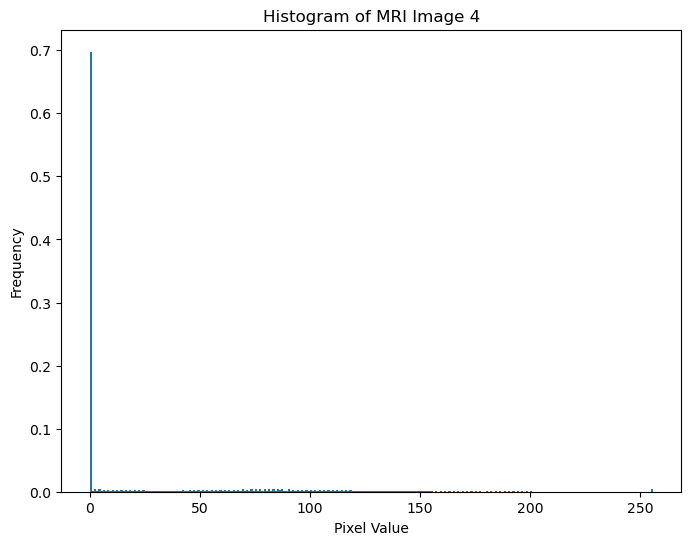

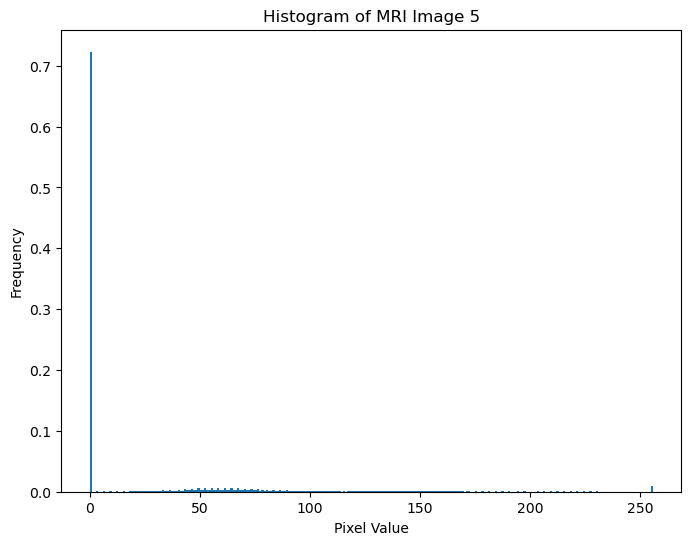

In [ ]:
# Abdominal CT

filename_Segmentation_ct = listImagesabdCT[indexIm]
im_Seg_ct = imread(filename_Segmentation_ct)
filename_ct = filename_Segmentation_ct[:-9] + '.tiff'
imG_ct = imread(filename_ct)

for indexIm, filename_Segmentation_ct in enumerate(listImagesabdCT):
    im_Seg_ct = imread(filename_Segmentation_ct)
    filename_ct = filename_Segmentation_ct[:-9] + '.tiff'
    imG_ct = imread(filename_ct)

    # Plot the histogram of the current MRI image (imG_ct)
    plt.figure(figsize=(8, 6))
    plt.hist(imG_ct.ravel(), bins=256, range=(0, 256), density=True)
    plt.title(f'Histogram of MRI Image {indexIm}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()



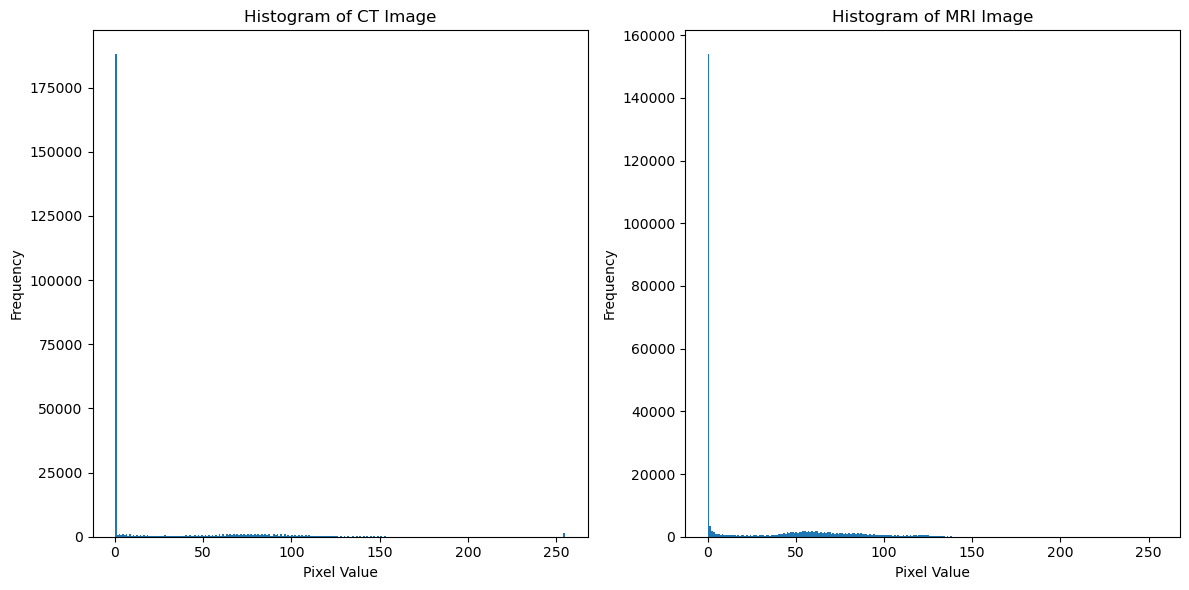

In [ ]:
indexIm=0

# Abdominal CT

filename_Segmentation_ct = listImagesabdCT[indexIm]
im_Seg_ct = imread(filename_Segmentation_ct)
filename_ct = filename_Segmentation_ct[:-9] + '.tiff'
imG_ct = imread(filename_ct)


# Brain MRI
filename_Segmentation_mri = listImagesbrainMRI[indexIm]
#print(filename_Segmentation)
im_Seg_mri = imread(filename_Segmentation_mri)
filename_mri = filename_Segmentation_mri[:-8] + '.png'
imG_mri = imread(filename_mri)


# Histogram
# Create a Matplotlib figure
plt.figure(figsize=(12, 6))
'''
im1=imG_ct
im2=imG_mri
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.subplot(1, 2, 2)
plt.imshow(im2)

'''
# Plot the histogram for the CT image (imG_ct)
plt.subplot(1, 2, 1)
plt.hist(imG_ct.ravel(), bins=256)
plt.title('Histogram of CT Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot the histogram for the MRI image (imG_mri)
plt.subplot(1, 2, 2)
plt.hist(imG_mri.ravel(), bins=256)
plt.title('Histogram of MRI Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* Tissue Characteristics: Images of the same modality often exhibit consistent patterns in their histograms. For example, CT images of bones typically show high-intensity peaks, while soft tissue regions have different intensity distributions. In MRI, various tissue types (fat, muscle, water) may exhibit unique histogram features.
* Pathological Variations: Images of the same modality but of different patients or different parts of the body may exhibit variations due to disease or pathology. Pathological conditions can lead to changes in tissue density or contrast, resulting in differences in histograms.
* Contrast and Windowing: The contrast and windowing settings may vary within the same modality, affecting the appearance of histograms.

CT and MRI are fundamentally different in terms of the physical properties they capture. CT measures X-ray attenuation, while MRI captures magnetic resonance signals. Consequently, their histograms will inherently differ due to the different physical information being measured.

The intensity scales used in CT and MRI differ, making direct comparisons challenging. CT uses Hounsfield Units (HU) that can range from -1000 (air) to 1000 (bone), while MRI signal intensity can vary based on sequences and field strengths.

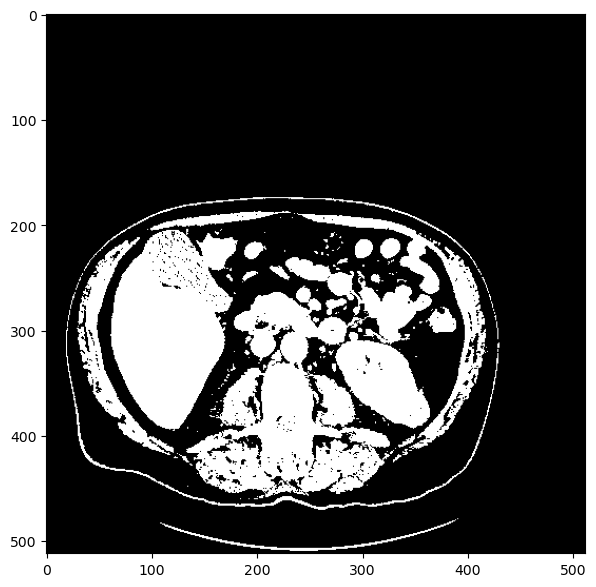

In [ ]:
# Abdominal CT
filename_Segmentation_ct = listImagesabdCT[indexIm]
im_Seg_ct = imread(filename_Segmentation_ct)
filename_ct = filename_Segmentation_ct[:-9] + '.tiff'
imG_ct = imread(filename_ct)

# manual thresholding
thresh = 40
binary = (im > thresh) *255
fig = plt.figure(figsize=(17, 7))
plt.imshow(binary, cmap="gray", vmin=0, vmax=255)



Manual thresholding for image segmentation has several advantages and disadvantages, and its effectiveness depends on the specific characteristics of the image and the segmentation task.

 **Advantages:**

* Simplicity: Manual thresholding is a straightforward and easy-to-understand method. It is accessible to individuals without extensive image processing or machine learning expertise.

* User Control: Manual thresholding allows the user to have direct control over the segmentation process. The user can select the threshold value based on their knowledge of the image and the specific task.

* Rapid Prototyping: Manual thresholding can be useful for rapid prototyping and initial exploration of image data, allowing to quickly assess the feasibility of a segmentation task.

* Transparency: The segmentation process is transparent, as the user defines the threshold value, making it easy to interpret and explain.

**Disadvantages:**

* Subjectivity: Manual thresholding is highly subjective. The choice of the threshold value is often influenced by the user's interpretation and may lead to variability between different users or sessions.

* Inefficiency: In cases where a large number of images or a high-resolution image needs to be segmented, manual thresholding can be time-consuming and impractical.

* Limited Adaptability: Manual thresholding does not adapt to variations in image quality, lighting conditions, or image content. It may not be suitable for images with complex or uneven illumination.

* Insensitive to Noise: Manual thresholding is sensitive to noise, and noisy images can lead to inaccurate segmentations. Noise may also affect the choice of the threshold value.

* Dependent on Image Characteristics: The success of manual thresholding depends on the specific characteristics of the image, such as the distribution of pixel values and the separation between object and background.


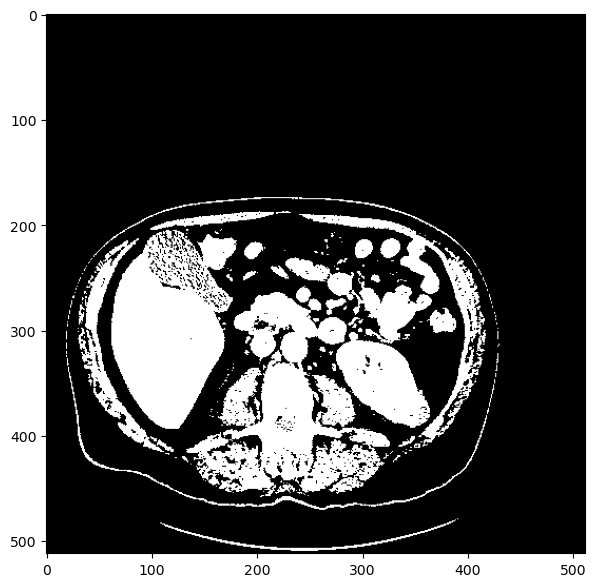

In [ ]:
# Otsu thresholding

# Abdominal CT
filename_Segmentation_ct = listImagesabdCT[indexIm]
im_Seg_ct = imread(filename_Segmentation_ct)
filename_ct = filename_Segmentation_ct[:-9] + '.tiff'
imG_ct = imread(filename_ct)

threshOtsu = threshold_otsu(imG_ct)
binaryOtsu = (im > threshOtsu) *255
fig = plt.figure(figsize=(17, 7))
plt.imshow(binaryOtsu, cmap="gray", vmin=0, vmax=255)

Otsu's thresholding automatically determines an optimal threshold value based on the image's characteristics, making it a powerful tool for image segmentation. This approach can be especially useful for automating the segmentation process.
We can see the difference in textures a little better in Otsu's thresholding, in any case, the choice between these two methods depends on our goal of the project and the knowledge we have about the photos. It's better to use manual thresholding when we have prior knowledge about the image content, or when we need user intervention to adjust the threshold based on specific criteria or visual inspection. It's better to use Otsu's thresholding when we need an automated, data-driven, and consistent approach that is robust to variations in image characteristics.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


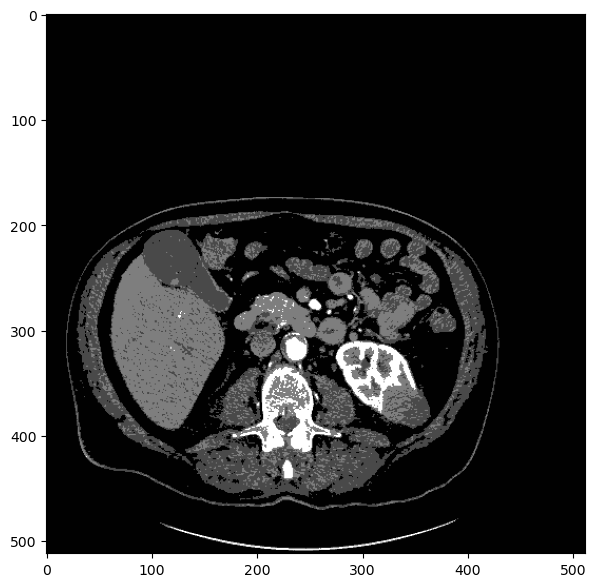

In [ ]:
# Abdominal CT
filename_Segmentation_ct = listImagesabdCT[indexIm]
im_Seg_ct = imread(filename_Segmentation_ct)
filename_ct = filename_Segmentation_ct[:-9] + '.tiff'
imG_ct = imread(filename_ct)

#k-means
from sklearn.cluster import KMeans

im=imG_ct
Ncluster=4

x, y = im.shape
imFloat = np.array(im, dtype=np.float64) / 255 # transform into float for computational reason
kmeans = KMeans(n_clusters=Ncluster) # use K-means algorithm
kmeans.fit(imFloat.reshape(x*y,1)) # fit to the data reshapds as a 1D vector

cluster_centers = kmeans.cluster_centers_ # estimated centers
cluster_labels = kmeans.labels_ # estimated labels for each pixel

kmeansSeg = cluster_centers[cluster_labels].reshape(x, y) # reshaped as the original image

fig = plt.figure(figsize=(17, 7))
plt.imshow(kmeansSeg, cmap="gray", vmin=0, vmax=np.max(kmeansSeg))


The K-means method has separated tissues much more accurately than the previous two methods. When we ran the algorithm with different number of clusters, we concluded that the more the number of clusters, the more details we have of the textures. In general, the choice between these methods depends on our goal, the previous two methods are computationally simpler and their execution time was less, but K-means is computationally more complex, but it is much more accurate.

**2. Initialize a segmentation by region growing, watersheds or deformable models from the previous results (the method can vary according to the images and the subsequent segmentation method), and try to improve this initialization using pre- and post-processing (filtering, etc.).**

(512, 512)


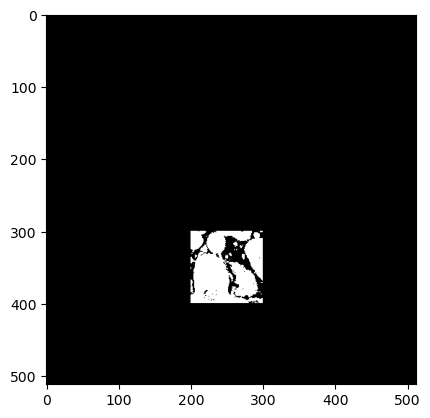

In [ ]:
from skimage.morphology import dilation, erosion, opening , closing

temp=np.zeros((binary.shape[0],binary.shape[1]),dtype=np.uint8)
print(binary.shape)
for i in range(300,400):#y
    for j in range(200,300):#x
        temp[i,j]=255
init=np.minimum(binary,temp)
plt.imshow(init, cmap="gray", vmin=0, vmax=255)
plt.show()




**3. Segmentation by region growing**

The method works by iteratively grouping neighboring pixels or voxels that share similar characteristics (e.g., intensity values) into a region or segment.

* Seed Selection:Region growing starts with the selection of one or more seed points within the medical image. These seed points are typically chosen based on prior knowledge or user input. A seed point is a pixel or voxel within the region of interest that serves as the starting point for the segmentation.

* Initialization:The seed points form the initial regions of interest. These regions are usually small (containing only the seed point) at the beginning.

* Neighbor Connectivity:The algorithm defines the criteria for pixel or voxel connectivity. We use 4-connectivity.

* Pixel/Region Selection:The algorithm examines the neighboring pixels (or voxels) of the current region and assesses their similarity to the region's characteristics, such as intensity values.

* Growing Criteria:Pixels with characteristics (intensity values) similar to those of the current region are added to the region. This process continues iteratively as long as the growing criteria are met.


C:\Users\Asus\AppData\Local\Temp\ipykernel_7664\1257552509.py:1: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt


Text(0.5, 1.0, 'Region growing segmentation')

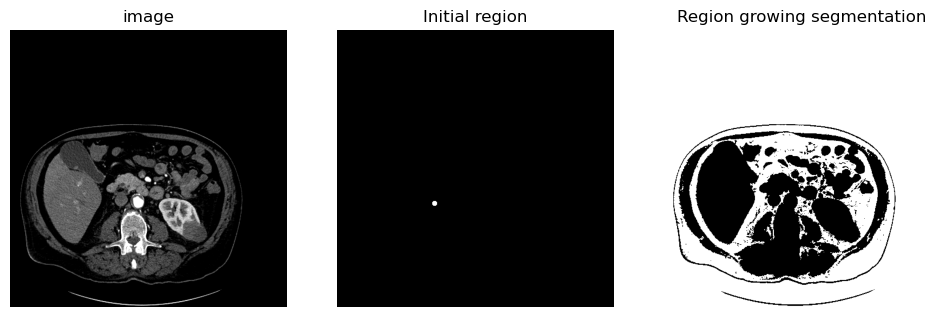

In [ ]:
from scipy.ndimage.morphology import distance_transform_edt

def initialize_segmentation(seed_pt,img_shape):
    seg_init = np.zeros(img_shape).astype(float)
    seg_init[ seed_pt[0], seed_pt[1]] = 1
    dist = distance_transform_edt(np.abs(1-seg_init))

    # initialise the seeded region with a certain radius
    size_radius = 5
    seg_init = dist < size_radius
    return seg_init

def segmentation_region_growing(img,seed_pt,tau):

    # define the neighbourhood (for instance 4-connected pixels)
    se=strel ('diamond',5)

    seg_init = initialize_segmentation(seed_pt,img.shape)
    seg_n_plus_1 = seg_init
    seg_n = np.zeros(seg_n_plus_1.shape)

    # loop while the region can still keep growing
    while( np.abs(seg_n_plus_1 != seg_n).sum() != 0):
        seg_n = seg_n_plus_1
        seg_n_plus_1 = morpho.dilation(seg_n, se).astype(seg_n.dtype)
        # calculate average value
        avg = np.sum( img[seg_n>0] ) / ( float(seg_n.sum()))
        seg_n_plus_1 = np.logical_and( seg_n_plus_1 , np.abs( img-avg ) < tau)
        # do not lose previous points of the segmentation
        seg_n_plus_1 = np.logical_or( seg_n_plus_1 , seg_n)

    return seg_n,seg_init

im=imG
seed_pt = np.asarray([320,180])  # initialization with only one point - Try to modify the code to initialize with one region obtained previously
tau = 20
img_out_region_growing,seg_init = segmentation_region_growing(im,seed_pt,tau)
fig = plt.figure(figsize=(12, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols = (1, 3),
                axes_pad = 0.5)
grid[0].imshow(im,cmap='gray')
grid[0].axis('off')
grid[0].set_title("image")
grid[1].imshow(seg_init,cmap='gray')
grid[1].axis('off')
grid[1].set_title("Initial region")
grid[2].imshow(img_out_region_growing,cmap='gray')
grid[2].axis('off')
grid[2].set_title("Region growing segmentation")



**4-Segmentation by watersheds with markers**

I tried this method on the Abdominal CT, but it's not useful for that.
I choose another image.

(512, 512)


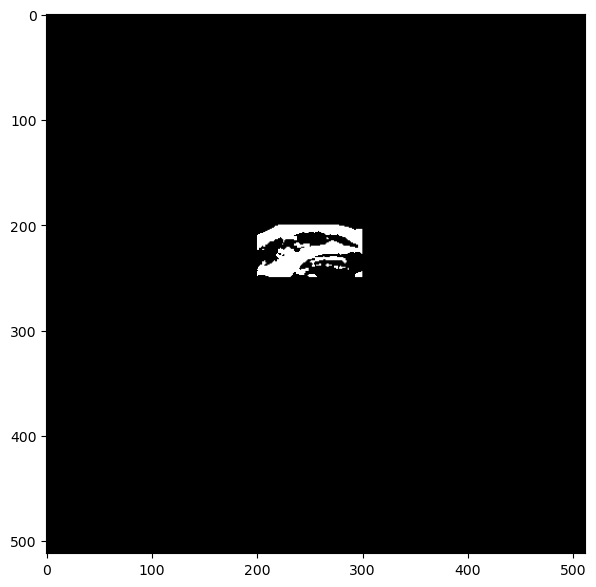

In [ ]:
# Brain MRI
indexIm=3
filename_Segmentation_mri = listImagesbrainMRI[indexIm]
#print(filename_Segmentation)
im_Seg_mri = imread(filename_Segmentation_mri)
filename_mri = filename_Segmentation_mri[:-8] + '.png'
imG_mri = imread(filename_mri)

im=imG_mri
# manual thresholding
# manual thresholding

thresh = 40
binary = (im > thresh) *255
fig = plt.figure(figsize=(17, 7))
plt.imshow(binary, cmap="gray", vmin=0, vmax=255)

temp=np.zeros((binary.shape[0],binary.shape[1]),dtype=np.uint8)
print(binary.shape)
for i in range(200,250):
    for j in range(200,300):
        temp[i,j]=255
init=np.minimum(binary,temp)#overlap binary and temp

plt.imshow(init, cmap="gray", vmin=0, vmax=255)

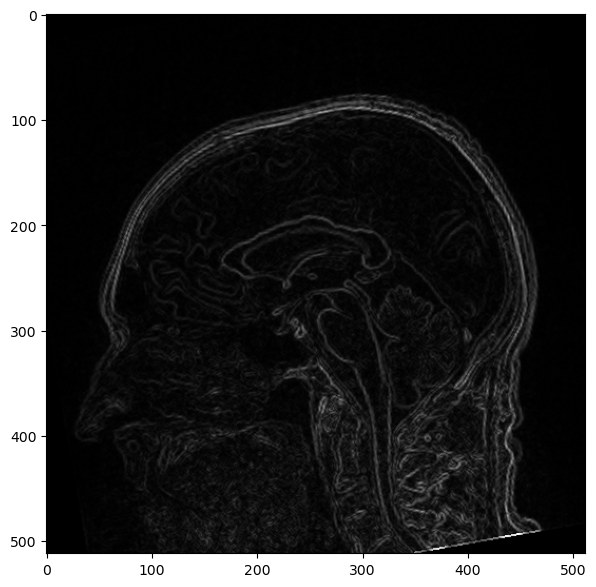

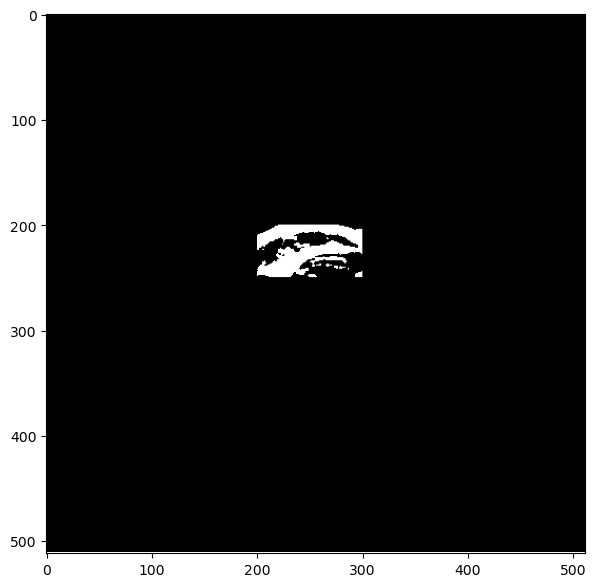

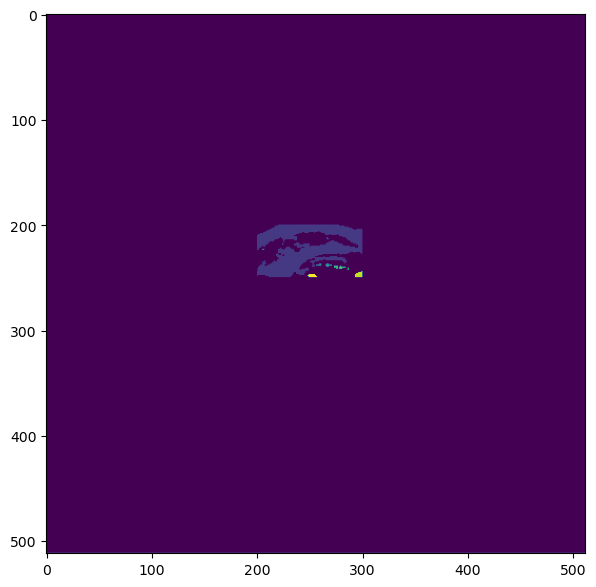

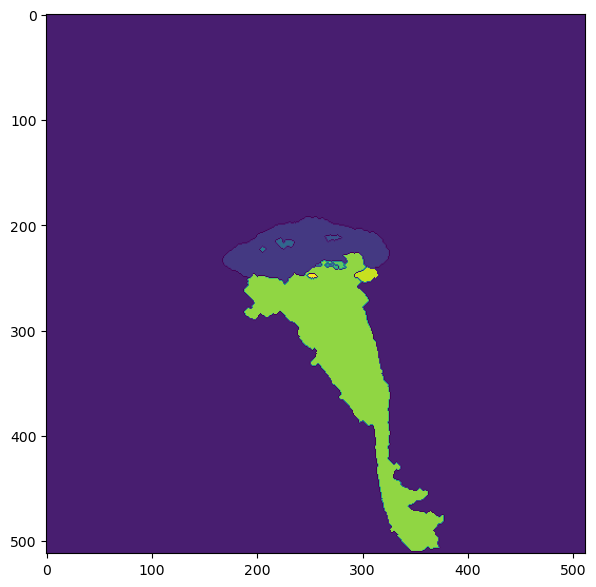

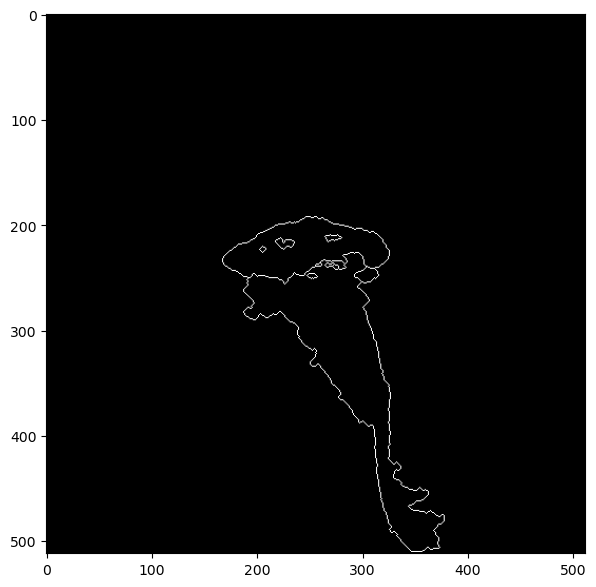

In [ ]:
from skimage.segmentation import watershed

#morphological gradient
se=morpho.disk(1)
grad=morpho.dilation(im,se)-morpho.erosion(im,se)
fig = plt.figure(figsize=(17, 7))
plt.imshow(grad, cmap="gray")

# Closing of the gradient
se1=strel('disk', 2)
grad=closing(grad,se1)

#add a marker at the border of the image
for i in range(init.shape[0]):
    init[i,0]=255
    init[i,init.shape[1]-1]=255
for j in range(init.shape[1]):
    init[0,j]=255
    init[init.shape[0]-1,j]=255
fig = plt.figure(figsize=(17, 7))
plt.imshow(init, cmap="gray", vmin=0, vmax=255)

markers = ndi.label(init)[0]
fig = plt.figure(figsize=(17, 7))
plt.imshow(markers)

labels = watershed(grad, markers,watershed_line=True)
fig = plt.figure(figsize=(17, 7))
plt.imshow(labels)

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
fig = plt.figure(figsize=(17, 7))
plt.imshow(segm, cmap="gray", vmin=0, vmax=255)

In [ ]:
# Quantitative evaluation using Dice index
def Dice(segm,segm_ref):
    if segm.shape != segm_ref.shape:
        raise ValueError("Les deux images doivent avoir la meme taille.")
    segm = np.asarray(segm).astype(np.bool)
    segm_ref = np.asarray(segm_ref).astype(np.bool)
    intersection = np.logical_and(segm, segm_ref)
    dice = 2.0 * intersection.sum() / (segm.sum()+segm_ref.sum())
    return dice

# Visual comparison (segm can be a segmentation mask or its contour)

def ComparVisu(image,segm):
    return np.maximum(image,segm)
def Contour(segm):
    se=morpho.disk(1)
    contour=morpho.dilation(segm,se)-segm
    # or dilation - erosion to get a 2 pixels width contour (symmetric and more visible)
    return contour

**Evaluate the model**

A Dice coefficient of 0.4767 indicates the level of agreement or overlap between our watershed segmentation and the ground truth.Interpretation: The Dice coefficient ranges from 0 to 1, with 0 indicating no overlap and 1 indicating a perfect match between the two segmentations.A Dice coefficient of approximately 0.4767 suggests that there is a moderate degree of overlap or agreement between our watershed segmentation and the binary. This means that some parts of our segmentation align well with the reference segmentation, but there are also areas where they do not overlap.

In [ ]:

binary = (binary != 0)
labels = (labels != 0)

# Compute the Dice coefficient
intersection = np.logical_and(binary, labels)
dice_coefficient = 2.0 * intersection.sum() / (binary.sum() + labels.sum())

# Print the Dice coefficient
print("Dice Coefficient:", dice_coefficient)

Dice Coefficient: 0.4767181325620239


In [ ]:
from sklearn.metrics import f1_score
dice_coefficient = f1_score(binary.ravel(), labels.ravel())
#Dice coefficient = F1 score
print("Dice Coefficient:", dice_coefficient)

Dice Coefficient: 0.47671813256202383


**5-Segmentation using deformable models
parametric model, contour-based segmentation
implicit model, using level sets (Chan & Vese), region-based segmentation**

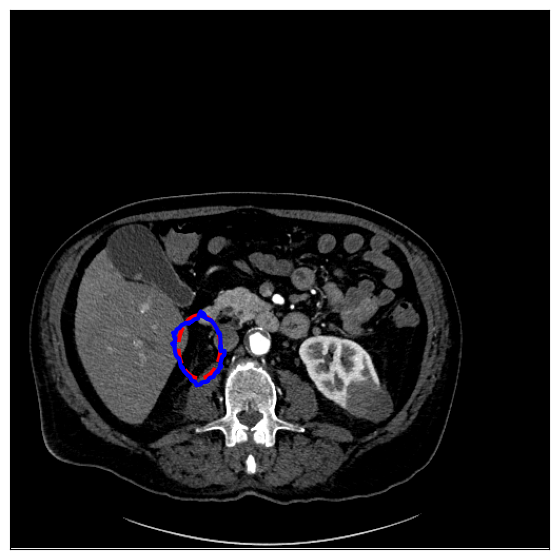

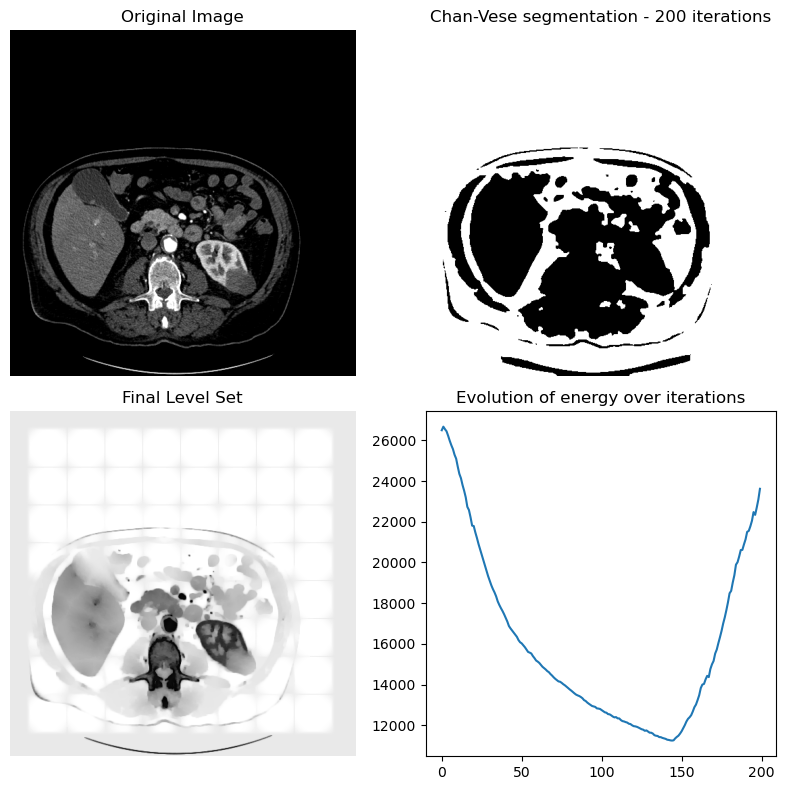

In [ ]:
# Segmentation by active contours
from skimage.draw import disk
im=imG

s = np.linspace(0, 2*np.pi, 100)
r = 320 + 30*np.sin(s)
c = 180 + 20*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 0.1),
                       init, alpha=0.1, beta=10, w_edge=100, w_line=100, gamma=0.01)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

#Segmentation using level sets and region information

image = img_as_float(im)

# Init avec un damier
#init_ls = checkerboard_level_set(image.shape, 6)

# Create an empty level set
init_ls = np.zeros(image.shape)
# Parameters for multiple circles
circleNum = 8
circleRadius = 25
circleStep0 = image.shape[0] // (circleNum + 1)
circleStep1 = image.shape[1] // (circleNum + 1)

for i in range(circleNum):
    for j in range(circleNum):
        center = ((i + 1) * circleStep0, (j + 1) * circleStep1)
        rr, cc = disk(center, circleRadius, shape=image.shape)
        init_ls[rr, cc] = 1

cv = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_num_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()


**6-Segmentation of an image sequence - On the cardiac MRI images, propose a segmentation method that uses the result in a frame to initialize the result in the next frame (use for instance slice z=2 or z-3). Illustrate and discuss the results. Is it relevant to use a similar approach to use the segmentation of a slice to guide the segmentation of the next slide? Discuss.**

In [ ]:
MRIheart_path = Working_directory + '/MRIheart/MRIheart/'
data=loadmat(MRIheart_path + 'dataMRIheart.mat')
data=data['data']
seg=loadmat(MRIheart_path + 'segMRIheart.mat')
seg=seg['seg']

In [ ]:
print('MRI volume of the heart composed of', data.shape[2], 'slices along the z axis and', data.shape[3],
'temporal frames. Each slice is an image ', data.shape[0], ' x ',  data.shape[1])
print('For each slice and at each time frame we have a manual segmentation composed of',seg[4,4].shape[0] , '2D landmarks')

print('Be careful, some slices do not have the left ventricle and the manual segmentation is not simply empty but it contains the value:', seg[0,0] )

MRI volume of the heart composed of 11 slices along the z axis and 20 temporal frames. Each slice is an image  256  x  256
For each slice and at each time frame we have a manual segmentation composed of 65 2D landmarks
Be careful, some slices do not have the left ventricle and the manual segmentation is not simply empty but it contains the value: [[-99999]]


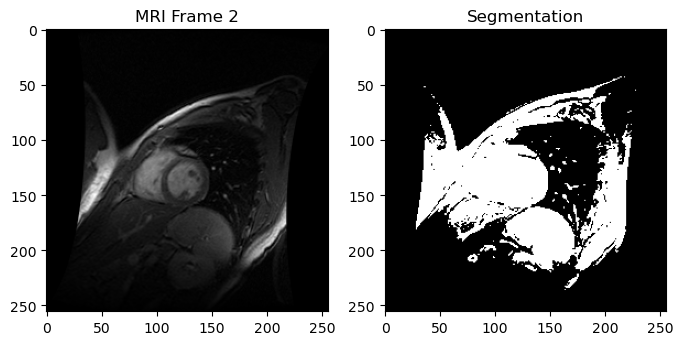

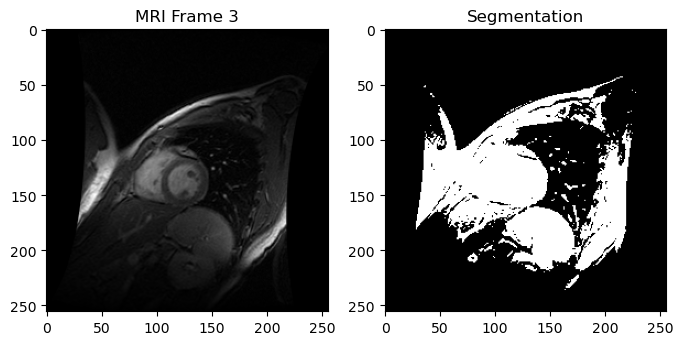

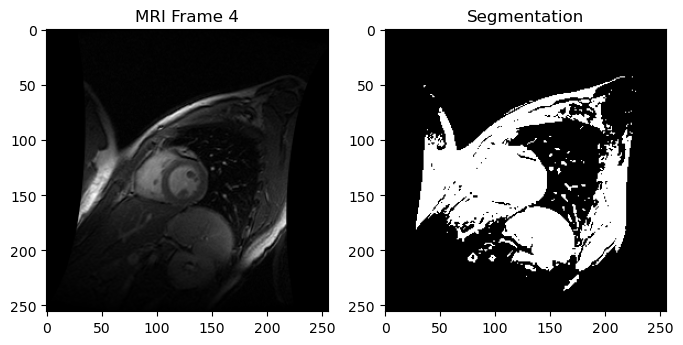

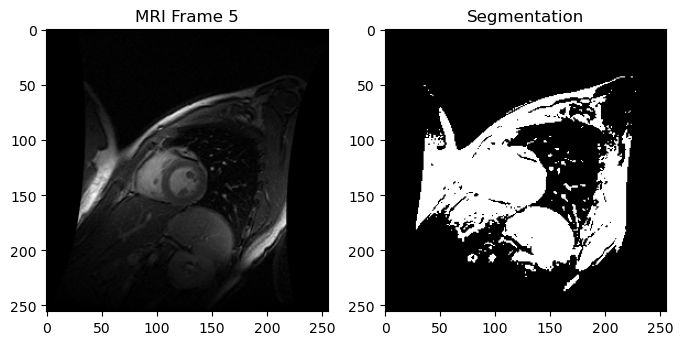

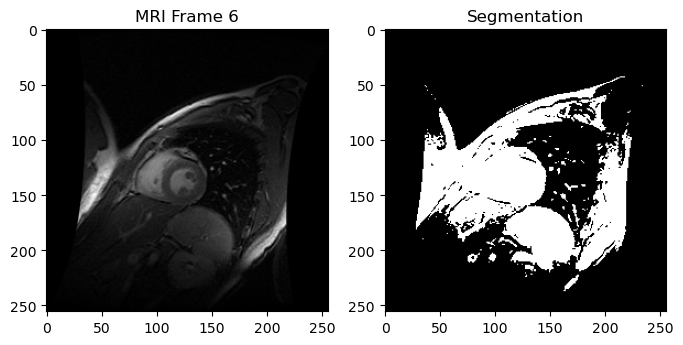

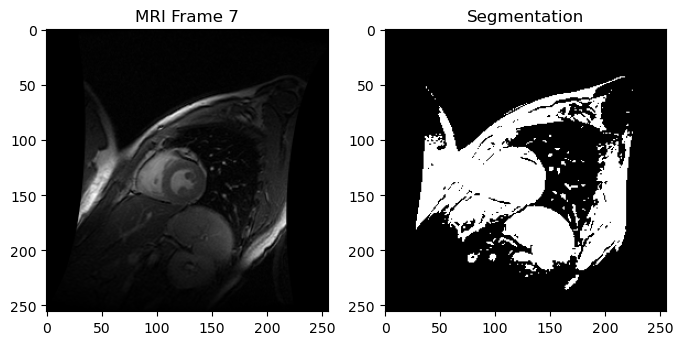

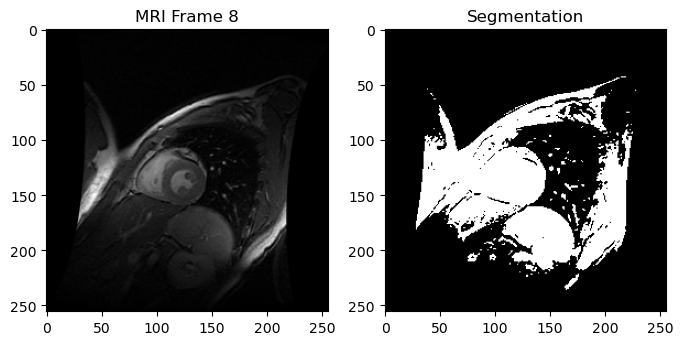

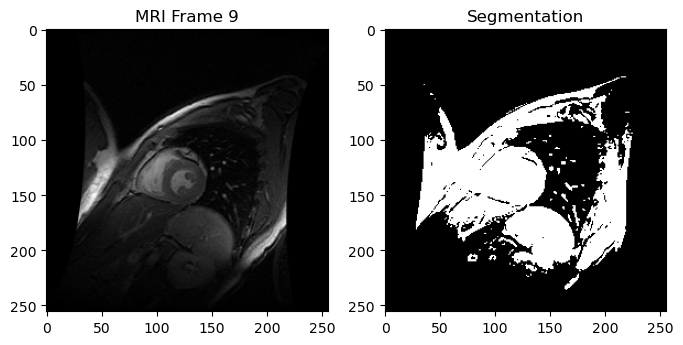

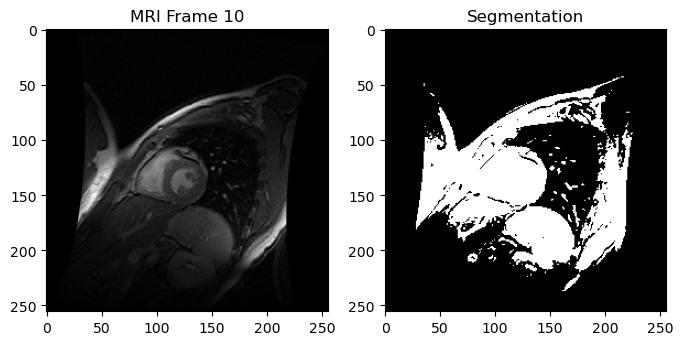

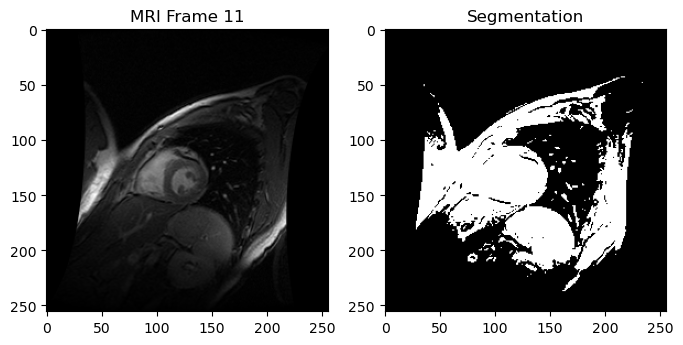

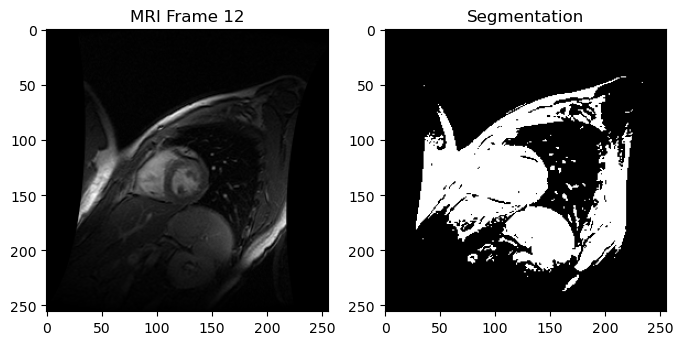

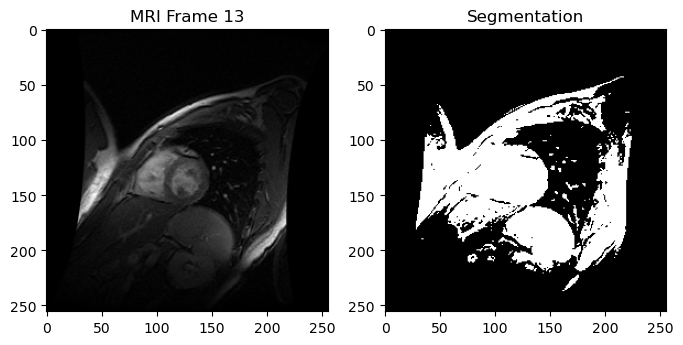

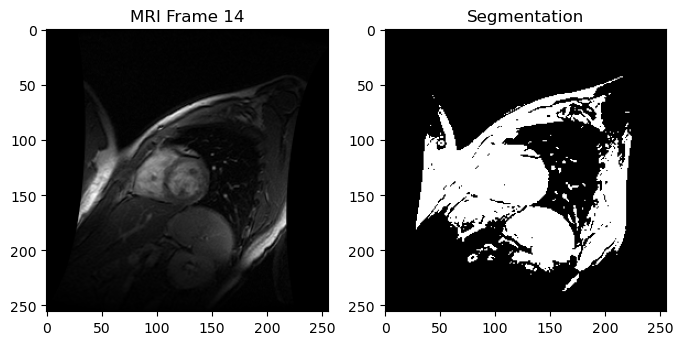

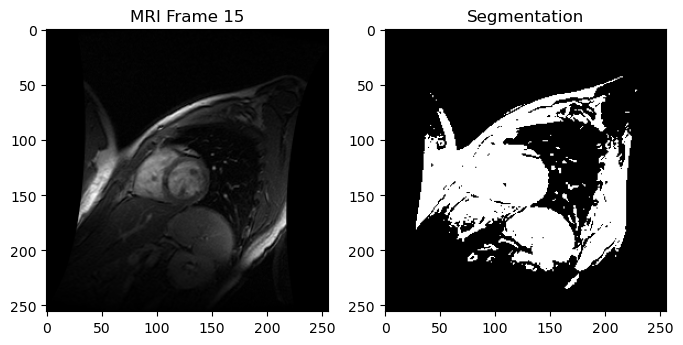

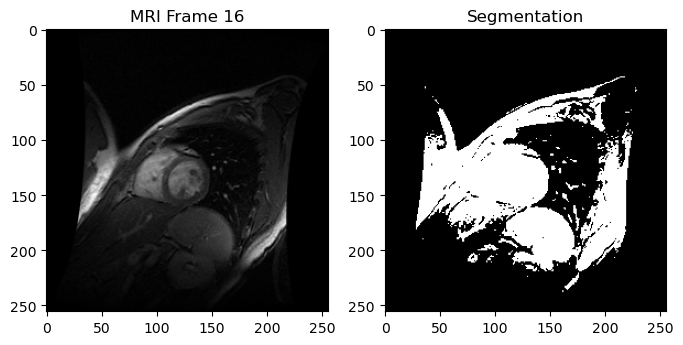

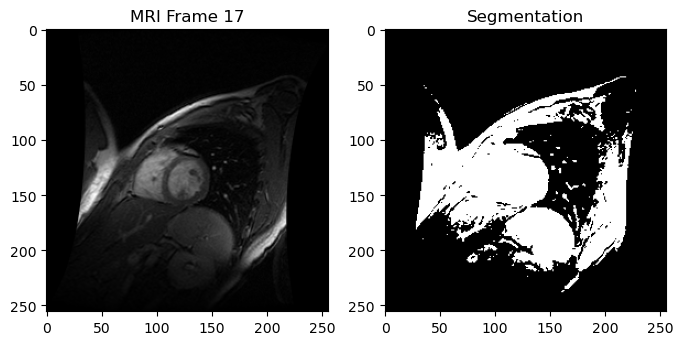

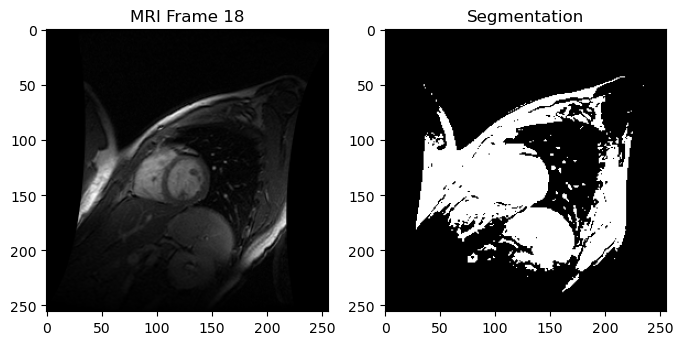

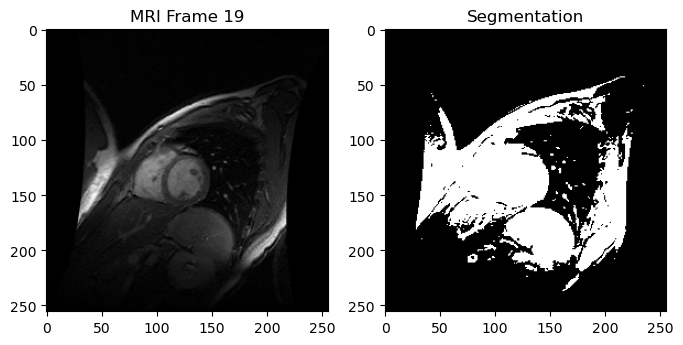

In [ ]:
from scipy.interpolate import splprep, splev
from skimage import measure

threshold_value = 100

# Define a function to interpolate landmarks to obtain a binary mask

def landmarks_to_mask(landmarks, shape):
    mask = np.zeros(shape)
    landmarks = np.array(landmarks)
    x, y = landmarks[:, 0], landmarks[:, 1]

    # Interpolate using splines
    tck, u = splprep([x, y], s=0)
    new_points = splev(u, tck)

    # Create a binary mask
    mask[np.round(new_points[1]).astype(int), np.round(new_points[0]).astype(int)] = 1
    return mask

# Initialize segmentation in the first frame
prev_mask = landmarks_to_mask(seg[4, 1], data[:, :, 4, 1].shape)

# Loop through frames
for frame_idx in range(2, data.shape[3]):
    # Use segmentation from the previous frame as initialization
    initial_mask = prev_mask

    # Apply a segmentation method on the current frame
    current_frame = data[:, :, 4, frame_idx]

    #segmentation using thresholding
    current_mask = current_frame > threshold_value

    # Update previous mask for the next frame
    prev_mask = current_mask

    # Visualize the current frame and segmentation
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(current_frame, cmap="gray")
    plt.title('MRI Frame {}'.format(frame_idx))
    plt.subplot(1, 2, 2)
    plt.imshow(current_mask, cmap="gray")
    plt.title('Segmentation')
    plt.show()



to demonstrate the use of results in one frame to initialize the segmentation in the next frame, we can follow these steps:

* Load the data and segmentation landmarks
* Define a segmentation method for a single frame
* Initialize the segmentation in the first frame.
* Loop through the temporal frames and use the segmentation result from the previous frame to initialize the segmentation in the  next frame
* Visualize and discuss the results

using the segmentation of a slice to guide the segmentation of the next slice is relevant and effective when dealing with cardiac MRI sequences due to the expected temporal consistency in the images.
When dealing with dynamic structures like the heart, it's important to maintain spatial and temporal coherence. A consistent initialization based on the previous frame's segmentation can help maintain the coherence of the segmented region throughout the cardiac cycle.
Cardiac MRI sequences typically exhibit temporal consistency, where the shape and position of anatomical structures, such as the left ventricle, remain relatively stable from one frame to the next during the cardiac cycle. Leveraging this temporal information can improve the accuracy and robustness of segmentation.
 Using the segmentation result from the previous frame as an initialization for the next frame can help the segmentation algorithm converge faster and produce more consistent results.